### ZJ_Zhang_M2_assn

### Introduction

**The dataset contains 9568 data points collected from a combined cycle power plant over 6 years, when power plant was under full load, and is provided by the University of California, Irvine at UCI Machine Learning Repository Combined Cycle Power Plant Data Set.A combined cycle power plant is composed of gas turbines, steam turbines and heat recovery steam generators. Electricity is generated by gas & steam turbines, which are combined in one cycle. Three ambient variables affect the performance of the gas turbine, and exhaust vacuum affects the performance of the steam turbine.** 

##### Steps:
1. Load Data
2. Data Preparation: check the types and if null value exists
3. Exploratory Data Analysis (EDA)to explore correlations between the predictors and the predictand
4. Data Splitting: separating data into training & testing subsets as needed
5. Model Training + Selection + Testing: Linear Regression Model Construction + Normal Distribution + K-Fold Cross Validation here
6. Conclusions

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from scipy.stats import chi2_contingency,iqr
from sklearn.preprocessing import OneHotEncoder

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
data = pd.read_csv("https://raw.githubusercontent.com/zhijing-zhang/DAV6150/master/M2_Data.csv")
data.head()

,T,V,AP,RH,EP
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [52]:
table = {'Meaning': ['Ambient Temperature', 'Exhaust Vacuum', 'Ambient Pressure','Relative Humidity','Net hourly electrical energy output'],
                    'Name': ['T','V', 'AP', 'RH', 'EP'],
                    'Range':['1.81 – 37.11°C', '25.36 – 81.56 cm Hg', '992.89 – 1033.30 millibar', '25.56% – 100.16%', '420.26 – 495.76 MW']}

df = pd.DataFrame(table, columns = ['Meaning', 'Name','Range'])
df

,Meaning,Name,Range
0,Ambient Temperature,T,1.81 – 37.11°C
1,Exhaust Vacuum,V,25.36 – 81.56 cm Hg
2,Ambient Pressure,AP,992.89 – 1033.30 millibar
3,Relative Humidity,RH,25.56% – 100.16%
4,Net hourly electrical energy output,EP,420.26 – 495.76 MW


In [53]:
data.describe()

,T,V,AP,RH,EP
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
T     9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
EP    9568 non-null float64
dtypes: float64(5)
memory usage: 373.9 KB


##### All the columns are numeric and there are no missing values.

### EDA

**Explore correlations between the predictors and the predictand to helps us to select appropriate models. If our features and the outcome are linearly related, we may start with linear regression models.If not, we should consider other models.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001974E9E2588>,
      dtype=object)

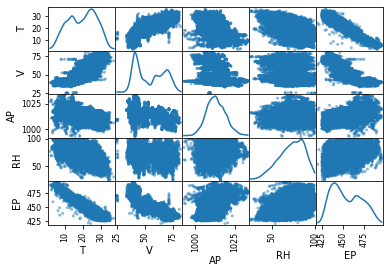

In [56]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, diagonal="kde")

'Net hourly electrical energy output' is the value we are trying to predict given the measurements above, we will rename 'Net hourly electrical energy output' as 'Power Output' in the following.


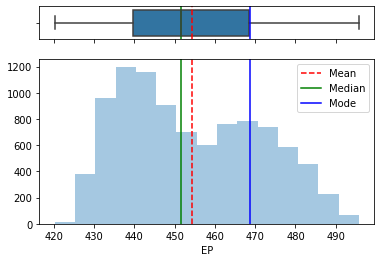

In [57]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=data.EP.mean()
median=data.EP.median()
mode=data.EP.mode()[0]

sns.boxplot(data.EP, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.distplot(data.EP, ax=ax_hist,bins=15,norm_hist=False,kde=False)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')

plt.legend({'Mean':mean,'Median':median,'Mode':mode})

ax_box.set(xlabel='')
plt.show()
f.savefig("EP_dist.jpg")

In [58]:
print("Mean:",str(mean))
print("Median:",str(median))
print("Mode:",str(mode))
print("IQR:",str(iqr(data.EP)))
print("SD:",str(data.EP.std()))

Mean: 454.3650094063554
Median: 451.54999999999995
Mode: 468.8
IQR: 28.680000000000007
SD: 17.066994999803423


Here we can know the distribution of Power Output.

Next are the correlation between:
- Power output and Temperature
- Exhaust Vacuum Speed and Power output
- Exhaust Vacuum Speed and Power output
- Relative Humidity and Power output

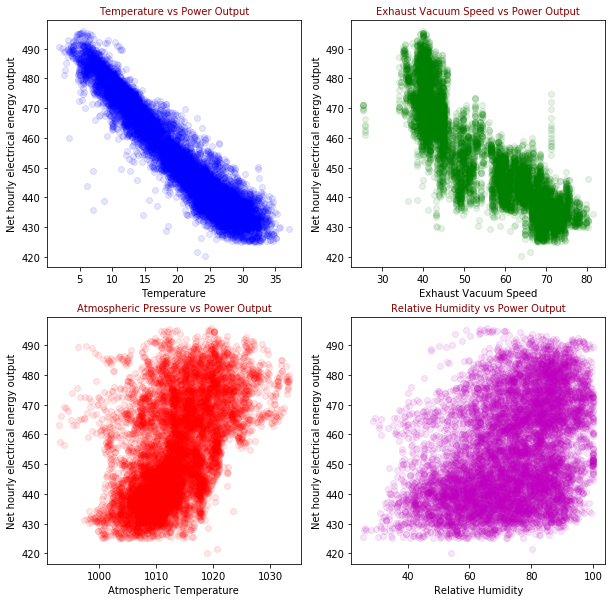

In [59]:
plt.figure(figsize=(10,10))

ax = plt.subplot(2,2,1)
plt.scatter(x =data['T'], y = data['EP'],color ="b", alpha = 0.1)
plt.title("Temperature vs Power Output",fontsize = 10, color="darkred")
plt.xlabel("Temperature", fontsize = 10) 
plt.ylabel("Net hourly electrical energy output", fontsize = 10)

ax = plt.subplot(2,2,2)
plt.scatter(x =data['V'], y = data['EP'],color ="g", alpha = 0.1)
plt.title("Exhaust Vacuum Speed vs Power Output", fontsize = 10, color="darkred")
plt.xlabel("Exhaust Vacuum Speed", fontsize = 10) 
plt.ylabel("Net hourly electrical energy output", fontsize = 10)


ax = plt.subplot(2,2,3)
plt.scatter(x =data['AP'], y = data['EP'],color ="r", alpha = 0.1)
plt.title("Atmospheric Pressure vs Power Output", fontsize = 10, color="darkred")
plt.xlabel("Atmospheric Temperature", fontsize = 10) 
plt.ylabel("Net hourly electrical energy output", fontsize = 10)

ax = plt.subplot(2,2,4)
plt.scatter(x =data['RH'], y = data['EP'],color ="m", alpha = 0.1)
plt.title("Relative Humidity vs Power Output", fontsize = 10, color="darkred")
plt.xlabel("Relative Humidity", fontsize = 10) 
plt.ylabel("Net hourly electrical energy output", fontsize = 10)

plt.show()

##### As shown in the above figure, there is strong negative  linear correlation between Atmospheric Temperature and Power Output, negative  between Exhaust Vacuum Speed and Power Output. Almost non-relational in Atmospheric Pressure vs Power Output and Relative Humidity vs Power Output. 
##### By default this means that Temperature and Volume are positively corelated. 

Text(0, 0.5, 'Vacuum Speed')

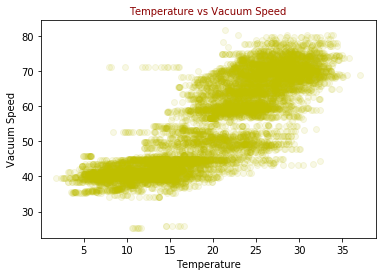

In [60]:
plt.scatter(x =data['T'], y = data['V'],color ="y", alpha = 0.1)
plt.title("Temperature vs Vacuum Speed",fontsize = 10, color="darkred")
plt.xlabel("Temperature", fontsize = 10) 
plt.ylabel("Vacuum Speed", fontsize = 10)

 We have the right assumption

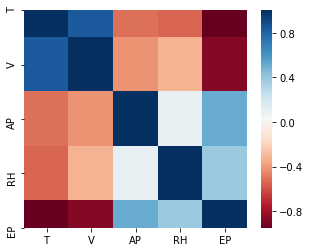

In [61]:
import seaborn as sns
corr = data.corr()
plt.figure(figsize = (5,4))
sns.heatmap(corr, cmap="RdBu",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

As shown in the correlation heatmap above, the more the value large the correlation stronger, therefor the target 'EP' has strong correlation with 'T' and 'V'. We will create multiple linear models to explore them.

### Regression Model Construction & Evaluation

##### First model data to predict the power output, based on linear regression since we saw some linear patterns in our data based on the scatter plots and correlation heatmap in the exploration stage.

##### Then we need a evaluation about how well our linear regression model predicts power output. We can do this by splitting up our initial data, using scikit-learn's train_test_split() function to create training and testing subsets, using the cross_val_score() function to evaluate the model’s performance in giving predictions automatically.

##### Moving the response variable 'EP' out, and splitting up rest dataset.

In [62]:
y = data['EP']
X = data.copy()
X.drop('EP', axis=1, inplace=True)
X.head()

,T,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


In [72]:
from sklearn.model_selection import train_test_split

# Here,if you use a particular value for random_state everytime the result will be same,i.e, same values in train and test datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### As shown below 80.0% of the data is for training and the rest 20.0% is for testing

In [73]:
X_train.head()

,T,V,AP,RH
5487,21.92,49.02,1009.29,88.56
3522,11.09,40.43,1025.47,74.97
6916,8.49,39.61,1021.05,87.74
7544,11.43,44.78,1013.43,82.45
7600,17.28,39.99,1007.09,74.25


In [74]:
y_train.head()

5487    443.31
3522    490.96
6916    483.94
7544    471.09
7600    463.28
Name: EP, dtype: float64

##### Here i want to compare variables 'Temperature' and 'Exhaust Vacuum Speed' to see which one has more influence on the prediction result, since these two has relational with 'Power Output' from the EDA above. Therefore, i test T+RH, R+RH, and T+R these three models, since the 'RH' has least relationship with Power Output'.

1. T + RH

In [75]:
# load the LinearRegression() function from sklearn's 'linear_model' sub-library
from sklearn.linear_model import LinearRegression

# load the cross_val_score function from the sklearn.model_selection module
from sklearn.model_selection import cross_val_score

# create a new dataframe containing only the DepDelay and TaxiOut variables (our explanatory variables for the linear
# regression model)
newX_train = X_train[['T', 'RH']].copy()

# sanity check
newX_train.head()

,T,RH
5487,21.92,88.56
3522,11.09,74.97
6916,8.49,87.74
7544,11.43,82.45
7600,17.28,74.25


In [76]:
import statsmodels.formula.api as st

ols = st.ols(formula = "EP ~ T +RH", data = data)
lr = ols.fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     EP   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                 5.572e+04
Date:                Sun, 31 May 2020   Prob (F-statistic):               0.00
Time:                        22:40:27   Log-Likelihood:                -28582.
No. Observations:                9568   AIC:                         5.717e+04
Df Residuals:                    9565   BIC:                         5.719e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    516.4765      0.401   1286.588      0.000     515.690     517.263
T             -2.3907      0.008   -305.037      0.000      -2.406      -2.375
RH            -0.2064      0.004    -51.594      0.000      -0.214      -0.199
==============================================================================
Omnibus:                      807.171   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3366.988
Skew:                          -0.331   Prob(JB):                         0.00
Kurtosis:                       5.830   Cond. No.                         630.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
#fitting linear model:
regressor = LinearRegression()  
regressor.fit(newX_train, y_train) #training the algorithm

#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

516.6462406269886
[-2.39781185 -0.20670527]


In [81]:
y_pred = regressor.predict(newX_train)
resss = (y_train - y_pred)

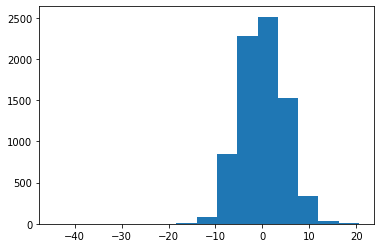

In [82]:
plt.hist(resss, bins = 15)
plt.rcParams['figure.figsize'] = (10,5)
plt.show()

This model is almost normal distribution! It looks perfect, then let's do a validation capability via K-Fold Cross Validation.

In [40]:
# Checking accuracy
# Assing the model function you want to use to a variable
model = LinearRegression()

# fit the model using 5-fold cross validation; note how the 'model' variable created above is used as a parameter for the 
# cross_val_score() function. Also note how we can specify the number of folds to use during cross validation via the 'cv' 
# parameter
scores = cross_val_score(model, newX_train, y_train, cv=10)

# print out the accuracy metrics derived from the K-fold cross validation process
print (scores)

[0.91595908 0.91852774 0.92049919 0.91546366 0.92214318 0.93039706
 0.92122407 0.92076801 0.91628477 0.9239099 ]


In [41]:
# calculate the average accuracy across all 10 folds
np.mean(scores)

0.9205176645533142

##### Our 10-fold cross validation shows that our model has a cross validated accuracy of 92.05%

2. V + RH

In [88]:
newX_train = X_train[['V', 'RH']].copy()

# sanity check
newX_train.head()

,V,RH
5487,49.02,88.56
3522,40.43,74.97
6916,39.61,87.74
7544,44.78,82.45
7600,39.99,74.25


In [89]:
ols = st.ols(formula = "EP ~ V +RH", data = data)
lr = ols.fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     EP   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                 1.619e+04
Date:                Sun, 31 May 2020   Prob (F-statistic):               0.00
Time:                        22:56:37   Log-Likelihood:                -33649.
No. Observations:                9568   AIC:                         6.730e+04
Df Residuals:                    9565   BIC:                         6.732e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    503.5895      0.667    755.404      0.000     502.283     504.896
V             -1.1132      0.007   -161.291      0.000      -1.127      -1.100
RH             0.1532      0.006     25.497      0.000       0.141       0.165
==============================================================================
Omnibus:                       51.997   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.732
Skew:                          -0.035   Prob(JB):                     9.76e-17
Kurtosis:                       3.424   Cond. No.                         736.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
#fitting linear model:
regressor = LinearRegression()  
regressor.fit(newX_train, y_train) #training the algorithm

#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

503.41497699710214
[-1.11269961  0.15536275]


In [91]:
y_pred = regressor.predict(newX_train)
resss = (y_train - y_pred)

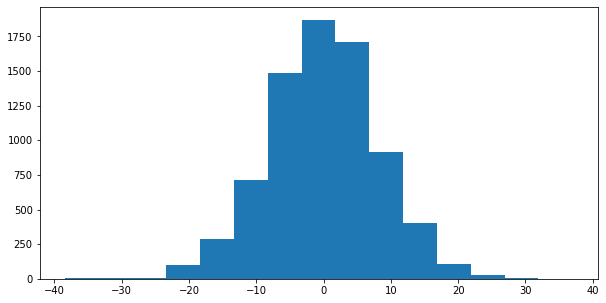

In [92]:
plt.hist(resss, bins = 15)
plt.rcParams['figure.figsize'] = (10,5)
plt.show()

This model is also almost normal distribution! **However, compared with the 'T+RH' model, the skew is more.** Then let's do a validation capability via K-Fold Cross Validation.

In [22]:
model = LinearRegression()
scores = cross_val_score(model, newX_train, y_train, cv=10)
print (scores)

[0.78960685 0.75773839 0.77125044 0.76648469 0.77356692 0.76437341
 0.78466357 0.76177415 0.77195197 0.77280507]


In [23]:
# calculate the average accuracy across all 10 folds
np.mean(scores)

0.7714215457662064

##### Our 10-fold cross validation shows that our model has a cross validated accuracy of 77.14%

3. T + V

In [93]:
newX_train = X_train[['T', 'V']].copy()

# sanity check
newX_train.head()

,T,V
5487,21.92,49.02
3522,11.09,40.43
6916,8.49,39.61
7544,11.43,44.78
7600,17.28,39.99


In [94]:
ols = st.ols(formula = "EP ~ T + V", data = data)
lr = ols.fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     EP   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 5.197e+04
Date:                Sun, 31 May 2020   Prob (F-statistic):               0.00
Time:                        23:01:03   Log-Likelihood:                -28887.
No. Observations:                9568   AIC:                         5.778e+04
Df Residuals:                    9565   BIC:                         5.780e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    505.4774      0.240   2101.855      0.000     505.006     505.949
T             -1.7043      0.013   -134.429      0.000      -1.729      -1.679
V             -0.3245      0.007    -43.644      0.000      -0.339      -0.310
==============================================================================
Omnibus:                      526.355   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1786.669
Skew:                          -0.198   Prob(JB):                         0.00
Kurtosis:                       5.080   Cond. No.                         282.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
#fitting linear model:
regressor = LinearRegression()  
regressor.fit(newX_train, y_train) #training the algorithm

#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

505.57850012694627
[-1.7089334  -0.32455446]


In [96]:
y_pred = regressor.predict(newX_train)
resss = (y_train - y_pred)

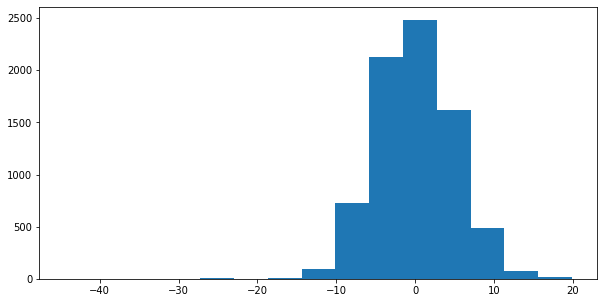

In [97]:
plt.hist(resss, bins = 15)
plt.rcParams['figure.figsize'] = (10,5)
plt.show()

This model is also almost normal distribution. And this one is better than second, but worse than first one.Then let's do a validation capability via K-Fold Cross Validation.

In [25]:
model = LinearRegression()
ore(model, newX_train, y_train, cv=10)
print (scores)

[0.91209676 0.9165293  0.91030002 0.90516416 0.91705922 0.92396386
 0.91955422 0.91609265 0.91251801 0.91901511]


In [26]:
# calculate the average accuracy across all 10 folds
np.mean(scores)

0.915229330080009

##### Our 10-fold cross validation shows that our model has a cross validated accuracy of 91.52%

#### The normal distribution graphics match the results of accuracy rank.

### Conclusions

Obviously, Temperature and Vacuum can explain and fit our data really well,while Ambient Pressure and Relative Humidity don't explain the data that well. The variable 'Temperature' has more influence on the prediction result, much more than the 'Exhaust Vacuum Speed', which makes the prediction more accurate. For these three models, we'd better to choose 'Temperature'+'Relative Humidity' as our model, which is the one that best fits the normal distribution. This result response to the above result.

However, here we only try to create linear models, maybe next time we can use other types of Machine Learning systems to get a more accurate result. 

### References

1. https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
2. https://github.com/karan-maheshwari/Linear-Regression/blob/master/Linear%20Regression%20on%20Combined%20Cycle%20Power%20Plant%20dataset.ipynb
3. https://risk-engineering.org/notebook/regression-CCPP.html